# Monitor the training process

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("https://zenodo.org/record/5071376/files/weather_prediction_dataset_light.csv?download=1")

![](https://carpentries-incubator.github.io/deep-learning-intro/fig/03_weather_prediction_dataset_map.png)

In [3]:
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [4]:
data.shape

(3654, 91)

In [5]:
89

89

In [6]:
{s.split('_')[-1] for s in data.columns if s not in ['MONTH', 'DATE']}

{'cover',
 'humidity',
 'max',
 'mean',
 'min',
 'precipitation',
 'pressure',
 'radiation',
 'sunshine'}

## Define the problem

In [7]:
nr_rows = 365*3

X_data = data.loc[:nr_rows].drop(columns=['DATE', 'MONTH'])
y_data = data.loc[1:(nr_rows + 1)]['BASEL_sunshine']



In [8]:
data.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,...,-4.626327,-6.884319,-2.352244,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,...,6.987080,7.120333,6.972886,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,...,-26.600000,-30.300000,-24.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,2.002070e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,...,-9.400000,-11.800000,-7.100000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,2.004567e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,...,-4.400000,-6.400000,-2.200000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,...,0.700000,-1.100000,2.700000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,...,13.800000,8.700000,14.300000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_holdout, y_train, y_holdout = train_test_split(X_data, y_data, \
                                                          test_size=0.3, \
                                                          random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, \
                                                          test_size=0.5, \
                                                          random_state=0)
                                                          

- Training set: training the neural network
- Test set: evaluating the trained neural network
- Validation set: monitor the neural network

In [10]:
365*3

1095

In [11]:
4/36
0.5

0.5

In [12]:


X_train, X_holdout ... = train_test_split( ..., test_size = (4./36.), ...)
X_val, X_test ... = train_test_split( X_holdout, y_holdout,..., test_size = .5, ...)


SyntaxError: invalid syntax (<ipython-input-12-6318bfd73a03>, line 1)

In [14]:
from numpy.random import seed

seed(1)

from tensorflow.random import set_seed
set_seed(2)

Mean squared error

In [16]:
def relu(x):
    return max(0, x)

In [17]:
from tensorflow import keras

def create_nn():
    # Input layer
    inputs = keras.Input(shape=(X_data.shape[1],), name='input')
    
    # Hidden layers (dense)
    layers_hidden = keras.layers.Dense(100, 'relu')(inputs)
    layers_hidden = keras.layers.Dense(50, 'relu')(layers_hidden)
    
    # Output layer
    outputs = keras.layers.Dense(1)(layers_hidden)
    
    return keras.Model(inputs=inputs, outputs=outputs, \
                       name='weather_prediction_model')
    
model = create_nn()    

In [18]:
model.summary()

Model: "weather_prediction_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 89)]              0         
                                                                 
 dense (Dense)               (None, 100)               9000      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 14,101
Trainable params: 14,101
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='mse', \
              optimizer='adam', \
              metrics=[keras.metrics.RootMeanSquaredError()])

In [20]:
history = model.fit(X_train, y_train, 
                    batch_size=32,
                    epochs=200,
                    verbose=2)
                    

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
24/24 - 0s - loss: 25.2525 - root_mean_squared_error: 5.0252 - 369ms/epoch - 15ms/step
Epoch 2/200
24/24 - 0s - loss: 14.2598 - root_mean_squared_error: 3.7762 - 26ms/epoch - 1ms/step
Epoch 3/200
24/24 - 0s - loss: 12.5559 - root_mean_squared_error: 3.5434 - 28ms/epoch - 1ms/step
Epoch 4/200
24/24 - 0s - loss: 12.0312 - root_mean_squared_error: 3.4686 - 27ms/epoch

Text(0, 0.5, 'RMSE')

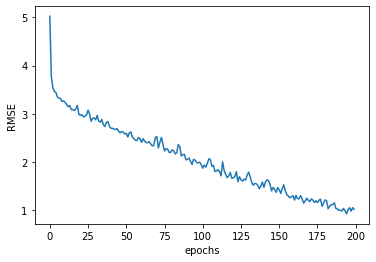

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df['root_mean_squared_error'])
plt.xlabel("epochs")
plt.ylabel("RMSE")

In [22]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Text(0, 0.5, 'true sunshine hours')

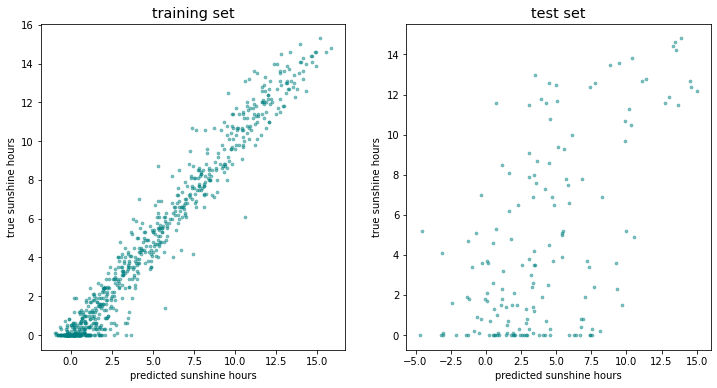

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.style.use('ggplot')  # optional, that's only to define a visual style
axes[0].scatter(y_train_predicted, y_train, s=10, alpha=0.5, color="teal")
axes[0].set_title("training set")
axes[0].set_xlabel("predicted sunshine hours")
axes[0].set_ylabel("true sunshine hours")

axes[1].scatter(y_test_predicted, y_test, s=10, alpha=0.5, color="teal")
axes[1].set_title("test set")
axes[1].set_xlabel("predicted sunshine hours")
axes[1].set_ylabel("true sunshine hours")


In [24]:
loss_train, rmse_train = model.evaluate(X_train, y_train)
loss_test, rmse_test = model.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6/6 [==============================] - 0s 1ms/step - loss: 16.0983 - root_mean_squared_error: 4.0123


### Next steps:
- Creating a baseline prediction
- Evaluate validation data during training
- Learn some methods to avoid overfitting

## workflow
7 Performing a prediction
8 Measuring performance

In [25]:
y_baseline_prediction = X_test['BASEL_sunshine']

Text(0, 0.5, 'true sunshine hours')

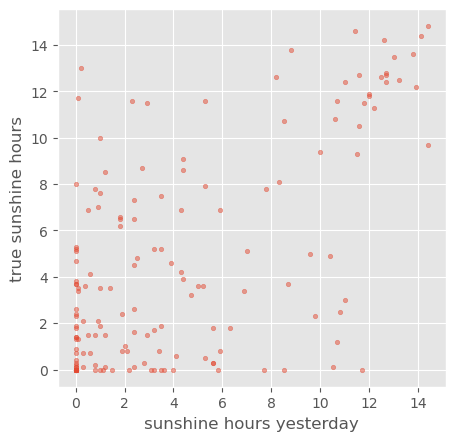

In [26]:
plt.figure(figsize=(5, 5), dpi=100)
plt.scatter(y_baseline_prediction, y_test, s=10, alpha=0.5)
plt.xlabel("sunshine hours yesterday")
plt.ylabel("true sunshine hours")

In [27]:
from sklearn.metrics import mean_squared_error
rmse_nn = mean_squared_error(y_test, y_test_predicted, squared=False)
rmse_baseline = mean_squared_error(y_test, y_baseline_prediction, squared=False)
print('NN RMSE:', rmse_nn)
print('BASELINE RMSE:', rmse_baseline)

NN RMSE: 4.0122729839533
BASELINE RMSE: 3.877323350410224


In [28]:
X_test.shape

(165, 89)

In [29]:
X_test.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,DE_BILT_cloud_cover,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
634,4,0.80,1.0221,1.44,0.00,5.3,12.3,8.3,17.9,7,...,-4.7,-6.2,-3.4,0.87,1.0188,0.76,0.14,15.2,10.7,19.7
1050,8,0.94,0.9989,0.07,1.29,0.0,8.8,7.1,10.0,8,...,-2.9,-3.8,-2.0,0.87,0.9994,0.76,0.08,9.2,3.0,15.4
403,7,0.69,1.0080,0.42,0.00,0.0,9.4,6.8,12.6,7,...,-6.2,-7.0,-5.4,0.91,0.9999,0.16,0.52,9.9,8.4,11.4
561,8,0.97,1.0160,0.49,2.65,0.0,13.3,10.9,17.1,6,...,4.2,2.5,5.8,0.71,1.0164,2.44,0.00,15.5,9.8,21.2
687,7,0.92,1.0245,0.57,0.00,3.6,-0.2,-1.7,3.7,7,...,-4.8,-7.9,-3.2,0.93,1.0221,0.16,0.00,2.0,0.3,3.8


In [32]:
model = create_nn()    
model.compile(loss='mse', \
              optimizer='adam', \
              metrics=[keras.metrics.RootMeanSquaredError()])

In [33]:
history = model.fit(X_train, y_train, 
                    batch_size=32,
                    epochs=200,
                    validation_data=(X_val, y_val),
                    verbose=2)
                    

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing 

Text(0, 0.5, 'RMSE')

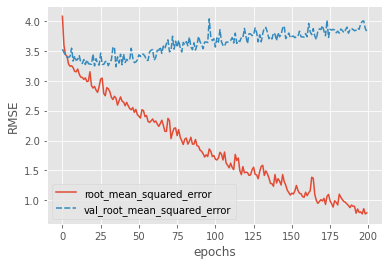

In [34]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])
plt.xlabel("epochs")
plt.ylabel("RMSE")

## Counteract model overfitting
#### Exercise: Try to reduce the degree of overfitting by lowering the number of parameters
We can keep the network architecture unchanged (2 dense layers + a one-node output layer) and only play with the number of nodes per layer. Try to to run a network with only 10 and 5 nodes in the first and second layer.

- Is it possible to get rid of overfitting this way?
- Does the overall performance suffer or does it mostly stay the same?
- (optional) How low can you go with the number of parameters without notable effect on the performance on the validation set?

In [35]:
def create_nn(nodes1, nodes2):
    # Input layer
    inputs = keras.Input(shape=(X_data.shape[1],), name='input')
    
    # Hidden layers (dense)
    layers_hidden = keras.layers.Dense(nodes1, 'relu')(inputs)
    layers_hidden = keras.layers.Dense(nodes2, 'relu')(layers_hidden)
    
    # Output layer
    outputs = keras.layers.Dense(1)(layers_hidden)
    
    return keras.Model(inputs=inputs, outputs=outputs, \
                       name='weather_prediction_model_variable_number_of_nodes')
    
model = create_nn(10, 5)    

In [36]:
model.summary()

Model: "weather_prediction_model_variable_number_of_nodes"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 89)]              0         
                                                                 
 dense_6 (Dense)             (None, 10)                900       
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='mse', \
              optimizer='adam', \
              metrics=[keras.metrics.RootMeanSquaredError()])

In [38]:
history = model.fit(X_train, y_train, 
                    batch_size=32,
                    epochs=200,
                    validation_data=(X_val, y_val),
                    verbose=2)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing 

Text(0, 0.5, 'RMSE')

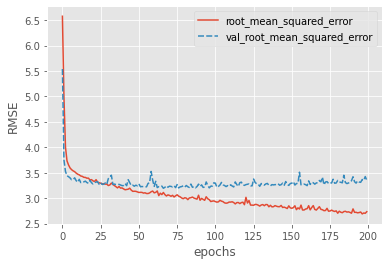

In [39]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])
plt.xlabel("epochs")
plt.ylabel("RMSE")

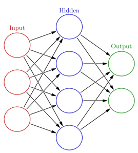

## Early stopping: stop at the right time before overfitting

In [40]:
model = create_nn(100, 50)
model.compile(optimizer='adam',
              loss='mse',
              metrics=[keras.metrics.RootMeanSquaredError()])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1)

In [44]:
history = model.fit(X_train, y_train, 
                    batch_size=32,
                    epochs=200,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper],
                    verbose=2)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing 

Text(0, 0.5, 'RMSE')

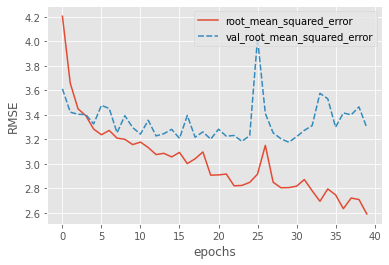

In [45]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])
plt.xlabel("epochs")
plt.ylabel("RMSE")

#### Open question: What could be next steps to further improve the model? (breakout rooms)
With unlimited options to modify the model architecture or to play with the training parameters, deep learning can trigger very extensive hunting for better and better results. Usually models are “well behaving” in the sense that small chances to the architectures also only result in small changes of the performance (if any). It is often tempting to hunt for some magical settings that will lead to much better results. But do those settings exist? Applying common sense is often a good first step to make a guess of how much better could results be. In the present case we might certainly not expect to be able to reliably predict sunshine hours for the next day with 5-10 minute precision. But how much better our model could be exactly, often remains difficult to answer.

- What changes to the model architecture might make sense to explore?
- Ignoring changes to the model architecture, what might notably improve the prediction quality?

* Remove features that have no predictive value, remove features that are correlated
* More data, data augmentation. 
* Adjust the number of layers and nodes. Use dropout! 